In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

# EDA And Feature Engineering

In [63]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")

In [64]:
data.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [65]:
data.tail(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [66]:
data.shape

(100000, 9)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [68]:
#check null values
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [69]:
# check Duplicet values in data
data.duplicated().sum()


0

In [70]:
# Separate catigorical and numerical data 
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['Name', 'Gender', 'Location'], dtype='object')
Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')


In [71]:
# Check unique value in catigorical data
for i in categorical_features:
    print(i,data[i].unique())
    print("="*60)

Name ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Gender ['Male' 'Female']
Location ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [72]:
# Check value count of catigorical data
for i in categorical_features:
    print(i,data[i].value_counts())
    print("="*60)
    

Name Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64
Gender Female    50216
Male      49784
Name: Gender, dtype: int64
Location Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


<Axes: xlabel='Gender'>

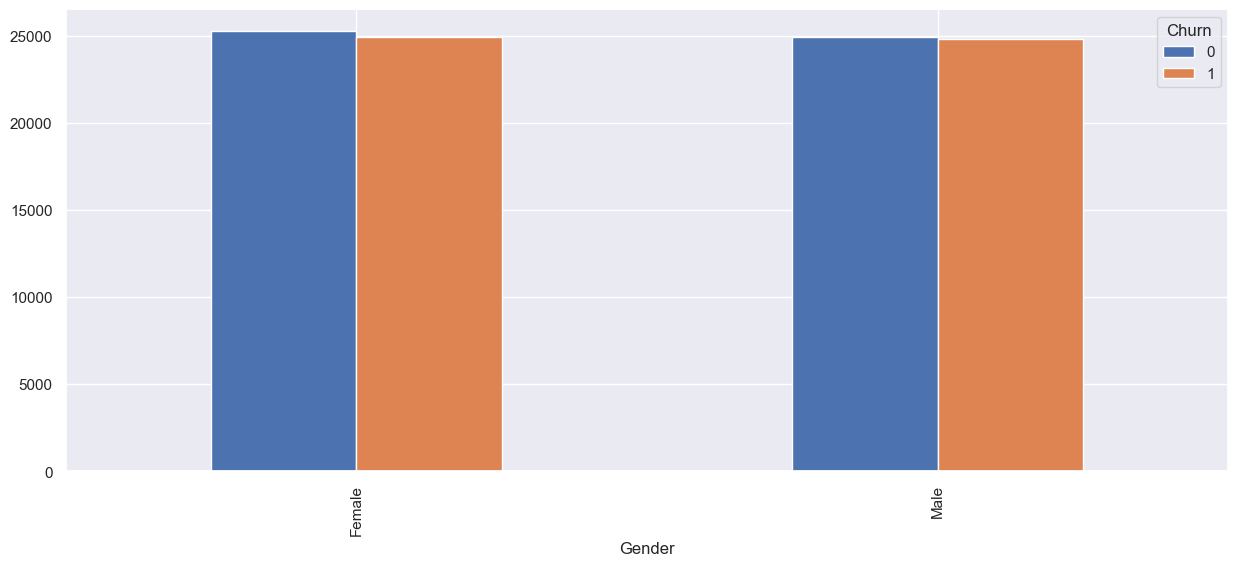

In [73]:
gender = pd.crosstab(data["Gender"],data["Churn"])
gender.plot(kind="bar")

<Axes: xlabel='Age'>

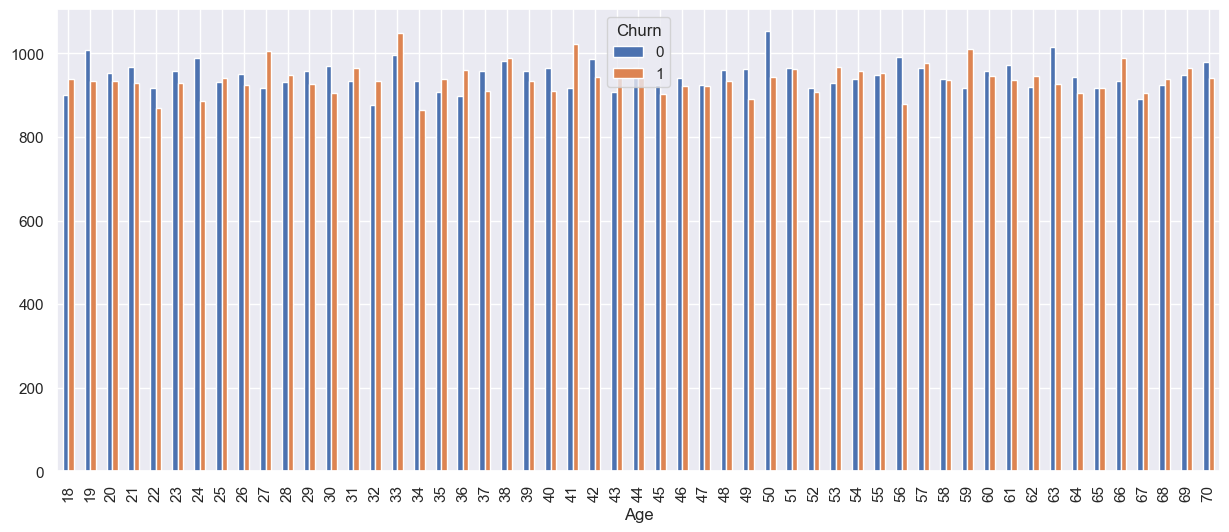

In [74]:
Age = pd.crosstab(data["Age"],data["Churn"])
Age.plot(kind="bar")

<Axes: xlabel='Location'>

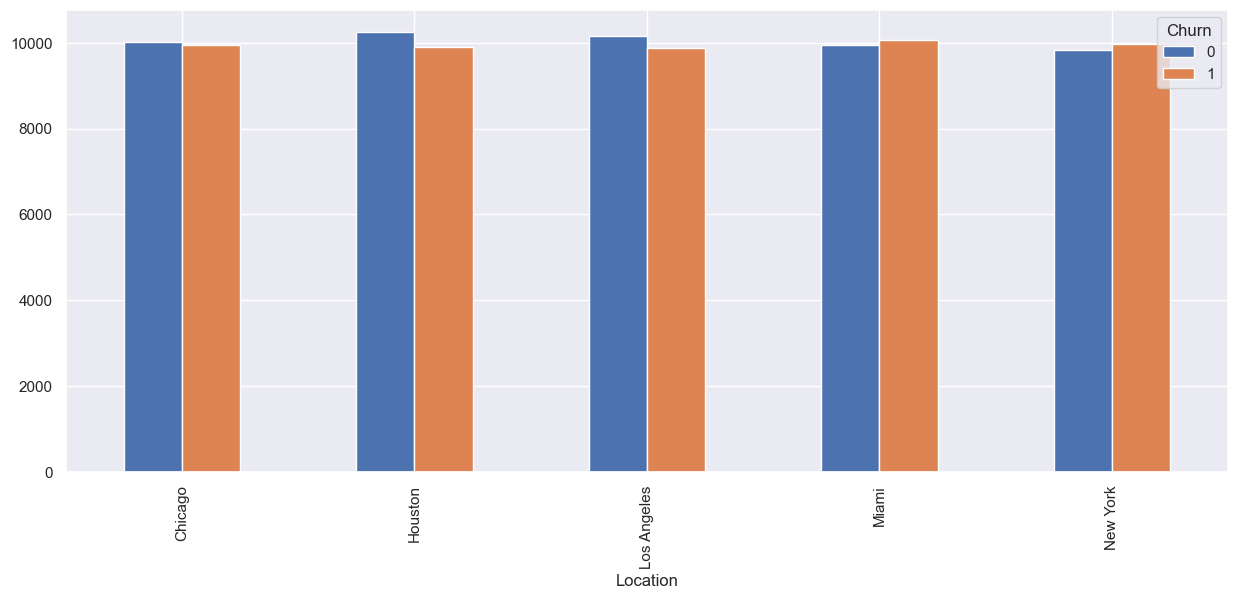

In [75]:
location = pd.crosstab(data["Location"],data["Churn"])
location.plot(kind="bar")

<Axes: ylabel='Churn'>

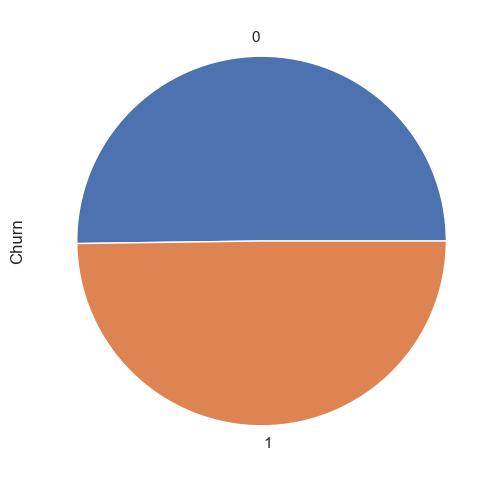

In [76]:
data["Churn"].value_counts().plot.pie()

In [77]:
#this pie chart shows the dataset is a balanced dataset

In [78]:
# Drop Usless Columns from data
data.drop(['CustomerID', 'Name'],axis=1,inplace=True)

In [79]:
data.head(2)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0


In [80]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['Gender', 'Location'], dtype='object')
Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [81]:
# now we have to do labelencoding on catiforical data
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
#categorical_features = ['hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# loop through the categorical features and encode them
for i in categorical_features:
    le.fit(data[i])
    data[i] = le.transform(data[i])

<Axes: >

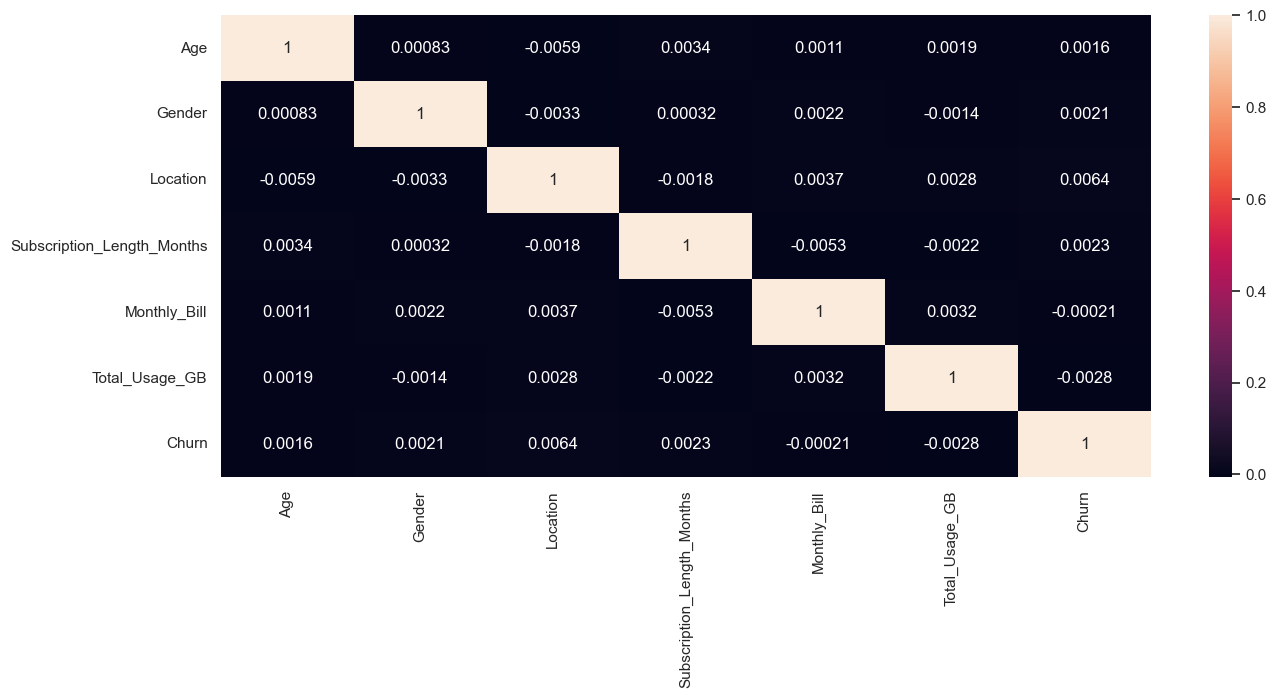

In [82]:
# Correlation With arget colums
sns.heatmap(data.corr(),annot=True)

# Model Traning

In [83]:
data.head(2)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0


In [84]:
# separate Dependent and indipendent Features
x = data.drop("Churn",axis=1)
y = data["Churn"]

In [85]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
##Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [87]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipeline = Pipeline(
        steps=[
            ('imputer',SimpleImputer(strategy ='most_frequent')),
            ('encode', OrdinalEncoder()),
            ('scaler',StandardScaler())
        ]

)

# Create preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ('cat_pipeline',cat_pipeline, categorical_features)
])

In [88]:
import pickle
file=open('preprocessor.pkl','wb')
pickle.dump(preprocessor,file)

In [89]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [90]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 6)
(80000,)
(20000, 6)
(20000,)


In [91]:
# transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [140]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay

In [94]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmetrix,pre,recall,f1score,accuracyscore

In [95]:
weights = {0:2,1:1}

In [96]:
logistic = LogisticRegression(class_weight=weights)

In [98]:
logistic.fit(X_train,y_train)

LogisticRegression(class_weight={0: 2, 1: 1})

In [99]:

logistic.score(X_train,y_train)

0.501775

In [101]:
y_predict = logistic.predict(X_test)

In [102]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[10079     0]
 [ 9921     0]]
PRECISION_SCORE: 0.0
RECALL_SCORE: 0.0
F1_SCORE: 0.0
ACCURACY_SCORE: 0.50395


(None, None, None, None, None)

In [103]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10079
           1       0.00      0.00      0.00      9921

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.25      0.50      0.34     20000



In [104]:
## Decision Tree
tree = DecisionTreeClassifier(class_weight="balanced")
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [105]:

tree.score(X_train,y_train)

1.0

In [106]:

y_predict = tree.predict(X_test)

In [107]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[5038 5041]
 [5020 4901]]
PRECISION_SCORE: 0.4929591631462482
RECALL_SCORE: 0.4940026207035581
F1_SCORE: 0.49348034033126914
ACCURACY_SCORE: 0.49695


(None, None, None, None, None)

In [108]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [109]:
## Support Vector Clessifier
svm  = LinearSVC(class_weight="balanced")
svm.fit(X_train,y_train)

LinearSVC(class_weight='balanced')

In [110]:
svm.score(X_train,y_train)

0.5035125

In [111]:
y_predict = svm.predict(X_test)

In [112]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[5013 5066]
 [4974 4947]]
PRECISION_SCORE: 0.4940577249575552
RECALL_SCORE: 0.49863925007559723
F1_SCORE: 0.4963379151198956
ACCURACY_SCORE: 0.498


(None, None, None, None, None)

In [113]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10079
           1       0.49      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [114]:
## Random Forest
forest = RandomForestClassifier(class_weight="balanced")
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [115]:
forest.score(X_train,y_train)

1.0

In [116]:
y_predict = forest.predict(X_test)

In [117]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[5282 4797]
 [5269 4652]]
PRECISION_SCORE: 0.4923272303947508
RECALL_SCORE: 0.468904344320129
F1_SCORE: 0.48033040784718634
ACCURACY_SCORE: 0.4967


(None, None, None, None, None)

In [118]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# HyperParameter Tuning

In [121]:
# Logistic Regression
logastic1 = LogisticRegression(random_state=42)
params = {
    "penalty":["l1", "l2", "elasticnet", None],
    "class_weight":["balanced"],
    'C': [0.001, 0.01, 0.1, 1, 10,10.1],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [122]:
grid_search = GridSearchCV(estimator=logastic1,param_grid=params,cv=3)

In [123]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 10.1],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [124]:
grid_search.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [125]:
grid_search.score(X_train,y_train)

0.505225

In [126]:
y_predict = grid_search.predict(X_test)

In [127]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[5142 4937]
 [5023 4898]]
PRECISION_SCORE: 0.49801728520589733
RECALL_SCORE: 0.4937002318314686
F1_SCORE: 0.49584936221907266
ACCURACY_SCORE: 0.502


(None, None, None, None, None)

In [128]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     10079
           1       0.50      0.49      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [129]:
## Support vector clessfier
svm1 = LinearSVC(random_state=42)
params ={
    'C': [0.1, 1, 10],
    "penalty":["l1", "l2",],
    "loss":["hinge", "squared_hinge"],
    "class_weight":["balanced"],
}

In [130]:
grid_search = GridSearchCV(estimator=svm1,param_grid=params,cv=3)

In [132]:

grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [134]:
grid_search.best_params_

{'C': 1, 'class_weight': 'balanced', 'loss': 'hinge', 'penalty': 'l2'}

In [135]:
grid_search.score(X_train,y_train)

0.5053125

In [136]:
y_predict = grid_search.predict(X_test)

In [137]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[5155 4924]
 [5077 4844]]
PRECISION_SCORE: 0.4959049959049959
RECALL_SCORE: 0.48825723213385747
F1_SCORE: 0.49205139925846925
ACCURACY_SCORE: 0.49995


(None, None, None, None, None)

In [138]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



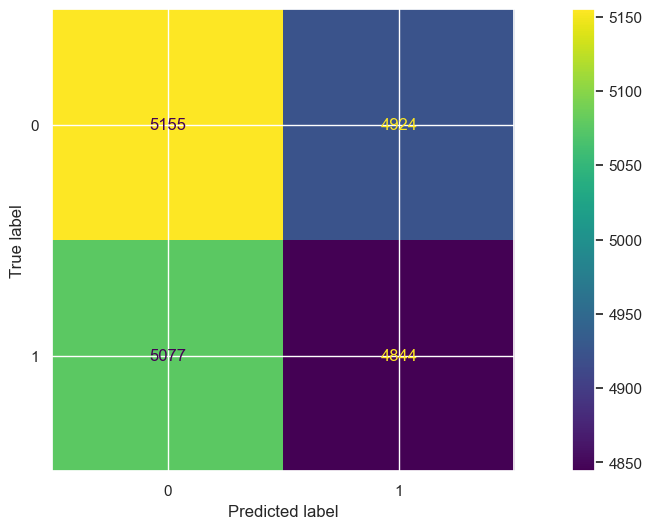

In [141]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [142]:
import pickle
file=open('best_model.pkl','wb')
pickle.dump(grid_search,file)